# Sprint 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import utils

In [3]:
df = utils.import_attrition_data()

df

['data\\customer_attrition_0.csv', 'data\\customer_attrition_1.csv', 'data\\customer_attrition_2.csv', 'data\\customer_attrition_3.csv', 'data\\customer_attrition_4.csv']


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
10001,771,France,Male,39,5,0.00,2,1,0,96270.64,0
10002,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
10003,709,France,Female,36,7,0.00,1,0,1,42085.58,1
10004,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# AT17

{'whiskers': [<matplotlib.lines.Line2D at 0x14dbf9639e0>,
 'caps': [<matplotlib.lines.Line2D at 0x14dbf963fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14dbf963740>],
 'medians': [<matplotlib.lines.Line2D at 0x14dbf990590>],
 'fliers': [<matplotlib.lines.Line2D at 0x14dbf990860>],
 'means': []}

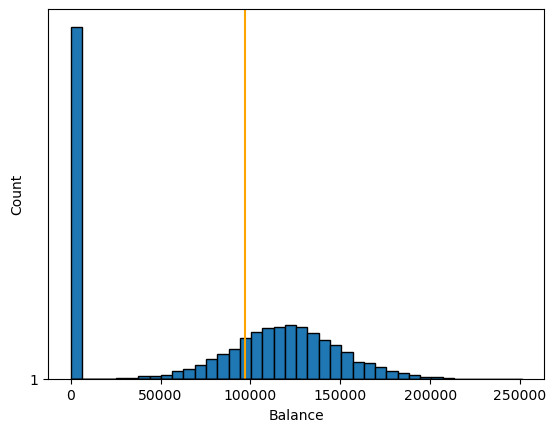

In [4]:
fig, ax = plt.subplots()

ax.hist(df["balance"], bins=40, edgecolor="black")

ax.set_xlabel("Balance")
ax.set_ylabel("Count")

ax.axvline(df["balance"].median(), color="orange", label="Median")

ax.boxplot(df["balance"], vert=False)


# AT18

{'whiskers': [<matplotlib.lines.Line2D at 0x14dbfc8eb70>,
 'caps': [<matplotlib.lines.Line2D at 0x14dbfc8f140>,
 'boxes': [<matplotlib.lines.Line2D at 0x14dbfc8e870>],
 'medians': [<matplotlib.lines.Line2D at 0x14dbfc8f6b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14dbfc8f950>],
 'means': []}

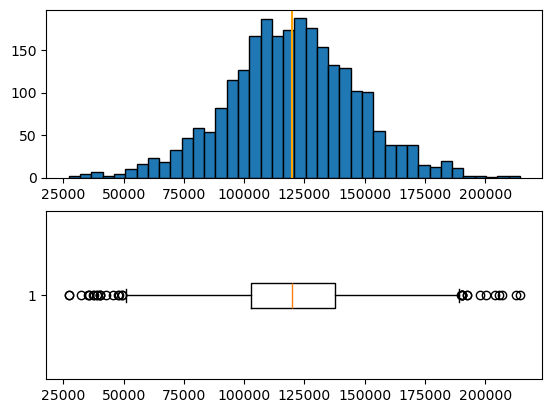

In [5]:
df_ger = df.loc[df["country"] == "Germany"]

fig, ax = plt.subplots(2,1)

ax[0].hist(df_ger["balance"], bins=40, edgecolor="black")
ax[0].axvline(df_ger["balance"].median(), color="orange", label="Median")

ax[1].boxplot(df_ger["balance"], vert=False)

# AT19

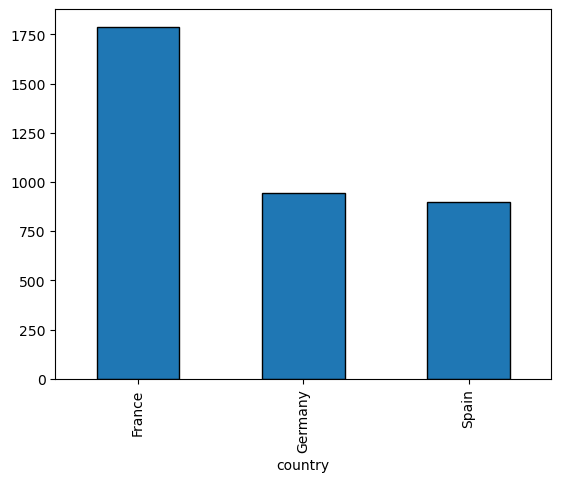

In [6]:
df_temp = df.loc[df["churn"] == 1 & (df["age"].between(30, 45))]
df_temp = df_temp.pivot_table(index="country", values="churn", aggfunc="count")
df_temp.rename(columns={"churn": "count"}, inplace=True)

ax = df_temp.plot.bar(edgecolor="black", legend=False)

# AT 20

Text(0, 0.5, 'Count(credit_card)')

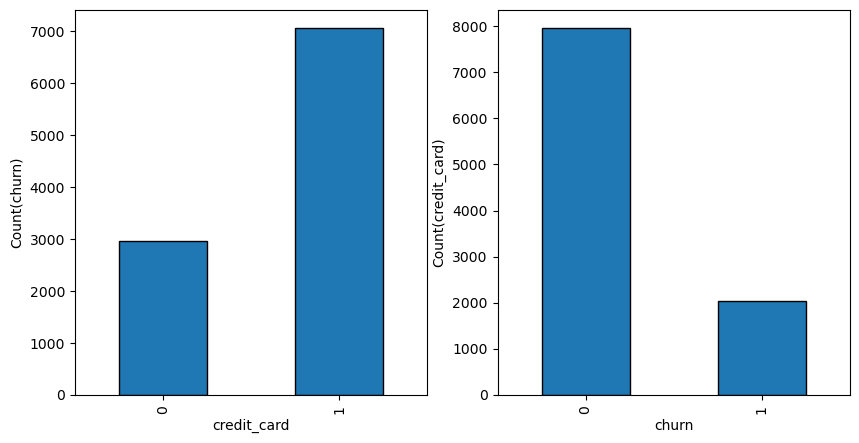

In [20]:
df_card = df.pivot_table(index="credit_card", values="churn", aggfunc="count")
df_churn = df.pivot_table(index="churn", values="credit_card", aggfunc="count")

fig, ax = plt.subplots(1,2, figsize=(10,5))

df_card.plot.bar(ax=ax[0], edgecolor="black", legend=False).set_ylabel("Count(churn)")

df_churn.plot.bar(ax=ax[1], edgecolor="black", legend=False).set_ylabel("Count(credit_card)")

# AT21

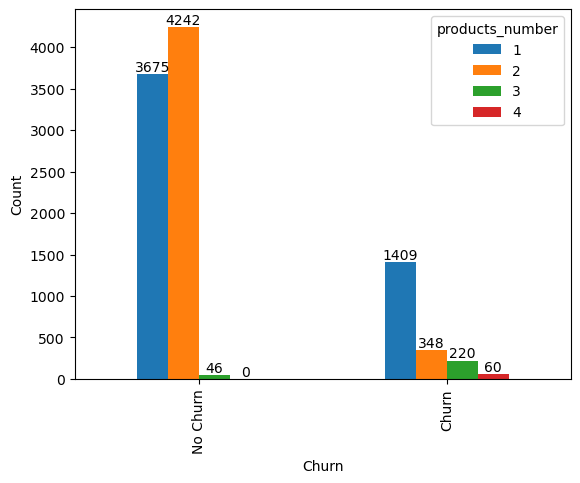

In [8]:
df_agg = df.pivot_table(index="churn", columns=["products_number"], aggfunc="size")

df_agg.fillna(0, inplace=True)

ax = df_agg.plot.bar()

ax.set_xticklabels(["No Churn", "Churn"])
ax.set_xlabel("Churn")
ax.set_ylabel("Count")

for i in ax.containers:
    ax.bar_label(i)


plt.show()

# AT22

In [9]:
relevant_columns = (df.dtypes != object)
df_corr = df.loc[:, relevant_columns].corr()
df_corr

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.004646,0.002120,0.007797,0.012267,-0.005379,0.025399,-0.000095,-0.026884
age,-0.004646,1.000000,-0.009997,0.028308,-0.030680,-0.011659,0.085472,-0.007201,0.285323
tenure,0.002120,-0.009997,1.000000,-0.012254,0.013444,0.022505,-0.028362,0.007784,-0.014001
balance,0.007797,0.028308,-0.012254,1.000000,-0.304180,-0.015375,-0.010084,0.012797,0.118533
products_number,0.012267,-0.030680,0.013444,-0.304180,1.000000,0.003582,0.009612,0.014204,-0.047820
credit_card,-0.005379,-0.011659,0.022505,-0.015375,0.003582,1.000000,-0.011850,-0.010125,-0.008004
active_member,0.025399,0.085472,-0.028362,-0.010084,0.009612,-0.011850,1.000000,-0.011421,-0.156128
estimated_salary,-0.000095,-0.007201,0.007784,0.012797,0.014204,-0.010125,-0.011421,1.000000,0.012097
churn,-0.026884,0.285323,-0.014001,0.118533,-0.047820,-0.008004,-0.156128,0.012097,1.000000


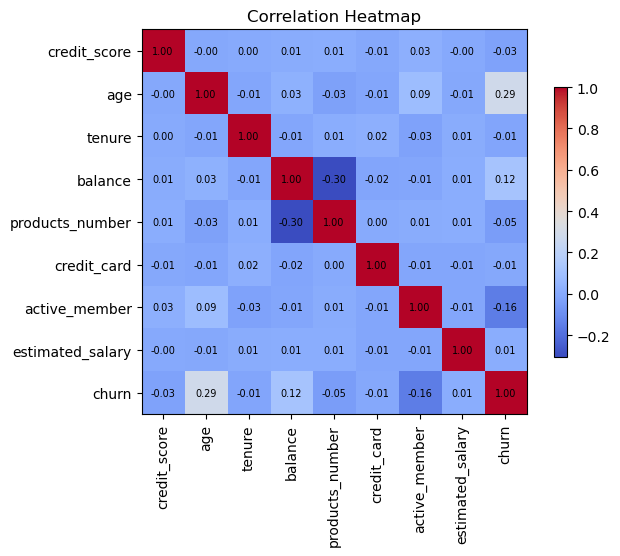

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))
img = ax.imshow(df_corr, cmap="coolwarm", interpolation="nearest")
fig.colorbar(img, shrink=0.7)

for i in range(df_corr.shape[0]):
    for j in range(df_corr.shape[1]):
        ax.text(j, i, f'{df_corr.iloc[i, j]:.2f}', ha="center", va="center", color="black", fontsize=7)

ax.set_xticks(np.arange(len(df_corr.columns)), df_corr.columns, rotation=90)
ax.set_yticks(np.arange(len(df_corr.columns)), df_corr.columns)
ax.set_title("Correlation Heatmap")

plt.show()

# AT23

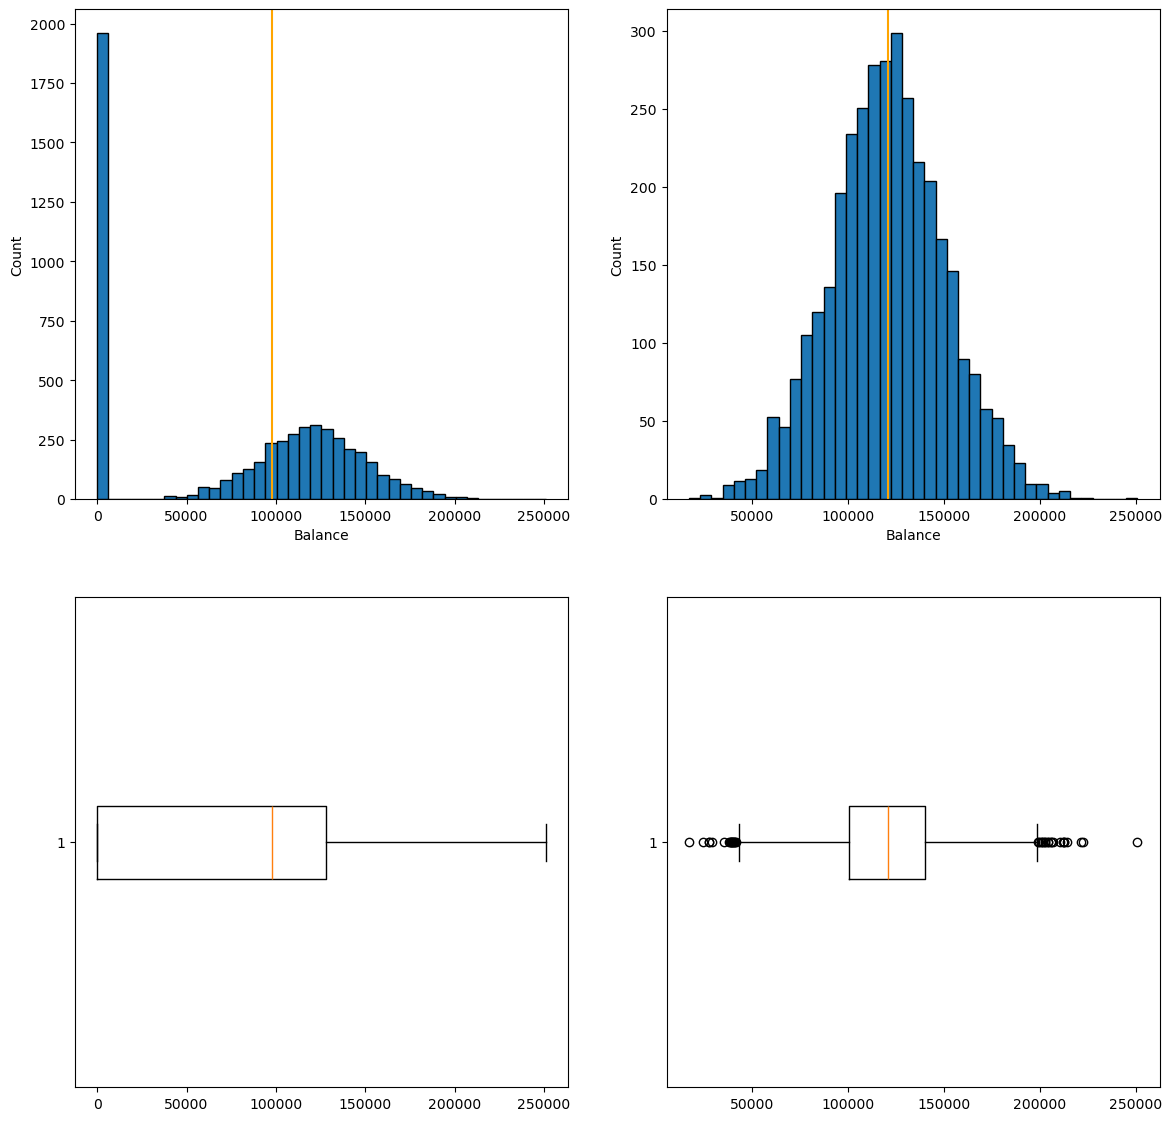

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
15,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0
9996,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9999,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
10002,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [11]:
df_man = df.loc[df["gender"] == "Male"]

fig, ax = plt.subplots(2,2, figsize=(14,14), )

ax[0][0].hist(df_man["balance"], bins=40, edgecolor="black")

ax[0][0].set_xlabel("Balance")
ax[0][0].set_ylabel("Count")

ax[0][0].axvline(df_man["balance"].median(), color="orange", label="Median")

ax[1][0].boxplot(df_man["balance"], vert=False)

#Second Column

df_man = df_man.loc[df["balance"] > 0]

ax[0][1].hist(df_man["balance"], bins=40, edgecolor="black")

ax[0][1].set_xlabel("Balance")
ax[0][1].set_ylabel("Count")

ax[0][1].axvline(df_man["balance"].median(), color="orange", label="Median")

ax[1][1].boxplot(df_man["balance"], vert=False)

plt.show()
df_man